# Classifier für Wohnungsbilder - Insights

## Load images and model

In [2]:
from keras.models import load_model
import os,sys
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


In [3]:
img_width = 75
img_height = 75

In [4]:
test_files_aussenansicht = os.listdir("data/clean/Test/Aussenansicht")
test_files_bad = os.listdir("data/clean/Test/Bad")
test_files_divers = os.listdir("data/clean/Test/Divers")
test_files_grundriss = os.listdir("data/clean/Test/Grundriss")
test_files_innenansicht = os.listdir("data/clean/Test/Innenansicht")
test_files_kueche = os.listdir("data/clean/Test/Küche")

imgs_aussenansicht = []
for i in test_files_aussenansicht:
    img = image.load_img("data/clean/Test/Aussenansicht/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    imgs_aussenansicht.append(img)
imgs_aussenansicht = np.asarray(imgs_aussenansicht)
    
imgs_bad = []
for i in test_files_bad:
    img = image.load_img("data/clean/Test/Bad/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    imgs_bad.append(img)
imgs_bad = np.asarray(imgs_bad)

imgs_divers = []
for i in test_files_divers:
    img = image.load_img("data/clean/Test/Divers/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    imgs_divers.append(img)
imgs_divers = np.asarray(imgs_divers)
    
imgs_grundriss = []
for i in test_files_grundriss:
    img = image.load_img("data/clean/Test/Grundriss/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    imgs_grundriss.append(img)
imgs_grundriss = np.asarray(imgs_grundriss)
    
imgs_innenansicht = []
for i in test_files_innenansicht:
    img = image.load_img("data/clean/Test/Innenansicht/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    imgs_innenansicht.append(img)
imgs_innenansicht = np.asarray(imgs_innenansicht)
    
imgs_kueche = []
for i in test_files_kueche:
    img = image.load_img("data/clean/Test/Küche/" + i, target_size=(img_width,img_height))
    img = image.img_to_array(img)/255
    imgs_kueche.append(img)
imgs_kueche = np.asarray(imgs_kueche)

In [5]:
sorted(os.listdir("data/clean/test"))

['.DS_Store',
 'Aussenansicht',
 'Bad',
 'Divers',
 'Grundriss',
 'Innenansicht',
 'Küche']

In [6]:
model = load_model("checkpoints/cnn_dg_5c2d/weights_epoch_020_val_loss_1.31")

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
__________

In [8]:
#model.layers[:]

In [9]:
#layer_dict['conv2d_2'].output

## Saliency maps from course
https://github.com/experiencor/deep-viz-keras/blob/master/README.md

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import tensorflow as tf
import PIL.Image
from PIL import Image
import keras.backend as K
from matplotlib import pylab as plt
%matplotlib inline

In [11]:
def show_image(image, grayscale = True, ax=None, title=''):
    if ax is None:
        plt.figure()
    plt.axis('off')
    
    if len(image.shape) == 2 or grayscale == True:
        if len(image.shape) == 3:
            image = np.sum(np.abs(image), axis=2)
            
        vmax = np.percentile(image, 99)
        vmin = np.min(image)

        plt.imshow(image, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
        plt.title(title)
    else:
        image = image + 127.5
        image = image.astype('uint8')
        
        plt.imshow(image)
        plt.title(title)
    
def load_image(file_path):
    im = PIL.Image.open(file_path)
    im = np.asarray(im)
    
    return im - 127.5

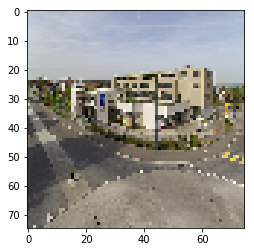

In [12]:
# Load and compile the model
#model = VGG16(weights='imagenet')
model.compile(loss='mean_squared_error', optimizer='adam')

# Load an image and make the prediction
# img_path = 'images/doberman.png'
#test_files_aussenansicht 
#test_files_bad 
#test_files_divers 
#test_files_grundriss 
#test_files_innenansicht 
#test_files_kueche

img = image.load_img("data/clean/Test/Aussenansicht/" + test_files_aussenansicht[15], target_size=(img_width,img_height))
img = image.img_to_array(img)/255
plt.imshow(img)

In [13]:
x = np.expand_dims(img, axis=0)
preds = model.predict(x)
label = np.argmax(preds)
preds, label

(array([[  1.65943518e-01,   3.92495592e-09,   8.34050894e-01,
           8.07182090e-08,   5.46368892e-06,   2.31473263e-09]], dtype=float32),
 2)

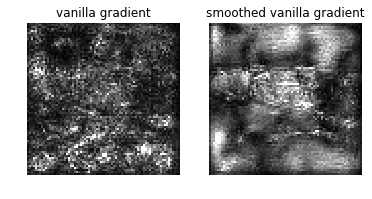

In [14]:
# Vanilla Gradient
from saliency import GradientSaliency
vanilla = GradientSaliency(model)
mask = vanilla.get_mask(img)
show_image(mask, ax=plt.subplot('121'), title='vanilla gradient')
mask = vanilla.get_smoothed_mask(img)
show_image(mask, ax=plt.subplot('122'), title='smoothed vanilla gradient')

INFO:tensorflow:Restoring parameters from /tmp/guided_backprop_ckpt


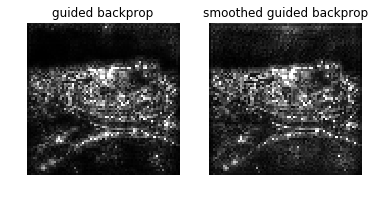

In [15]:
# Guided Backpropagation
from guided_backprop import GuidedBackprop
guided_bprop = GuidedBackprop(model) # A very expensive operation, which hackingly creates 2 new temp models
mask = guided_bprop.get_mask(img)
show_image(mask, ax=plt.subplot('121'), title='guided backprop')
mask = guided_bprop.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot('122'), title='smoothed guided backprop')

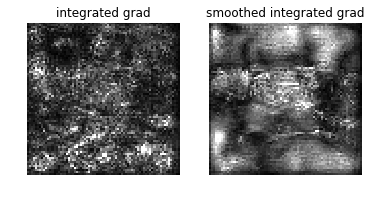

In [16]:
# Integrated Gradient
from integrated_gradients import IntegratedGradients
inter_grad = IntegratedGradients(model)
mask = inter_grad.get_mask(x[0])
show_image(mask, ax=plt.subplot('121'), title='integrated grad')
mask = inter_grad.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot('122'), title='smoothed integrated grad')

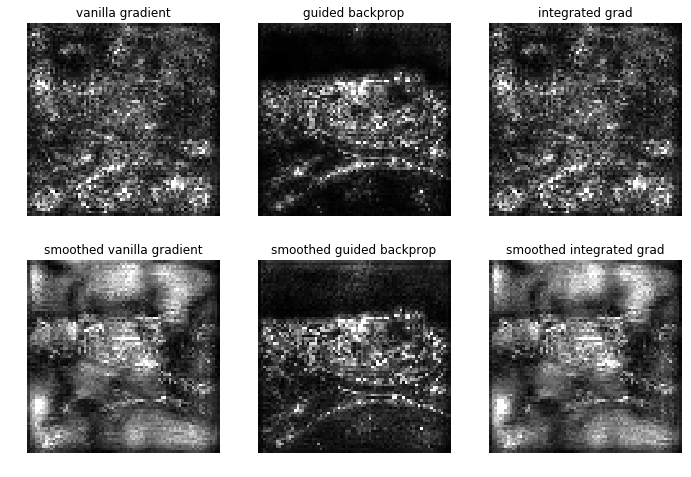

In [17]:
plt.figure(figsize=(20,8))

# Plot non-smoothed versions

mask = vanilla.get_mask(img)
show_image(mask, ax=plt.subplot(252), title='vanilla gradient')

mask = guided_bprop.get_mask(img)
show_image(mask, ax=plt.subplot(253), title='guided backprop')

mask = inter_grad.get_mask(x[0])
show_image(mask, ax=plt.subplot(254), title='integrated grad')

# Plot smoothed versions

mask = vanilla.get_smoothed_mask(img)
show_image(mask, ax=plt.subplot(257), title='smoothed vanilla gradient')

mask = guided_bprop.get_smoothed_mask(img)
show_image(mask, ax=plt.subplot(258), title='smoothed guided backprop')

mask = inter_grad.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot(259), title='smoothed integrated grad')

## Which pixels are important for the different classes?
https://github.com/marcotcr/lime

In [18]:
%load_ext autoreload
%autoreload 2
import lime
from lime import lime_image
from keras.models import load_model
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

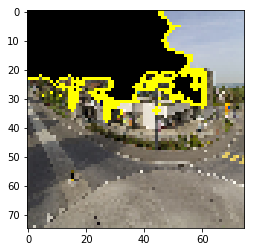

In [19]:
# Aussenansicht
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(imgs_aussenansicht[15],
                                         model.predict,
                                         labels=(0,1,2,3,4,5),
                                         hide_color = 0,
                                         num_samples=1000)
temp, mask = explanation.get_image_and_mask(
    label = 0,
    positive_only = True,
    hide_rest = True)
plt.imshow(mark_boundaries(temp, mask))

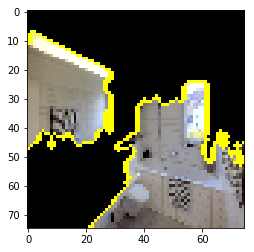

In [20]:
# Bad
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(imgs_bad[1],
                                         model.predict,
                                         labels=(0,1,2,3,4,5),
                                         hide_color = 0,
                                         num_samples=1000)
temp, mask = explanation.get_image_and_mask(
    label = 0,
    positive_only = True,
    hide_rest = True)
plt.imshow(mark_boundaries(temp, mask))

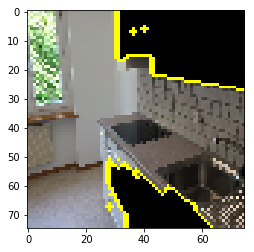

In [21]:
# Küche
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(imgs_kueche[2],
                                         model.predict,
                                         labels=(0,1,2,3,4,5),
                                         hide_color = 0,
                                         num_samples=1000)
temp, mask = explanation.get_image_and_mask(
    label = 0,
    positive_only = True,
    hide_rest = True)
plt.imshow(mark_boundaries(temp, mask))

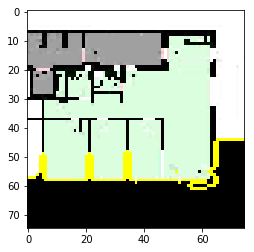

In [36]:
# Grundriss
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(imgs_grundriss[4],
                                         model.predict,
                                         labels=(0,1,2,3,4,5),
                                         hide_color = 0,
                                         num_samples=1000)
temp, mask = explanation.get_image_and_mask(
    label = 0,
    positive_only = True,
    hide_rest = True)
plt.imshow(mark_boundaries(temp, mask))

## What do the Conv-Filters look like?
https://github.com/keras-team/keras/blob/master/examples/conv_filter_visualization.py

In [23]:
'''Visualization of the filters of VGG16, via gradient ascent in input space.
This script can run on CPU in a few minutes.
Results example: http://i.imgur.com/4nj4KjN.jpg
'''

'Visualization of the filters of VGG16, via gradient ascent in input space.\nThis script can run on CPU in a few minutes.\nResults example: http://i.imgur.com/4nj4KjN.jpg\n'

In [24]:
from __future__ import print_function
from scipy.misc import imsave
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt

In [25]:
# dimensions of the generated pictures for each filter
img_width = 75
img_height = 75

In [26]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [27]:
model.input

<tf.Tensor 'conv2d_1_input:0' shape=(?, 75, 75, 3) dtype=float32>

In [28]:
# this is the placeholder for the input images
input_img = model.input

# get the symbolic outputs of each "key" layer (we gave them unique names)
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
#layer_dict

In [29]:
# the name of the layer we want to visualize
#layer_name = 'conv2d_1' # 32 filters ???
#layer_name = 'conv2d_2' # 32 filters
#layer_name = 'conv2d_3' # 32 filters
#layer_name = 'conv2d_4' # 64 filters
layer_name = 'conv2d_5' # 64 filters
no_filters = 64

In [30]:
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())

In [31]:
kept_filters = []

for filter_index in range(no_filters):  # we only scan through the first no_filters filters  
    
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :, :])
    else:
        loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_img_data = np.random.random((1, 3, img_width, img_height))
    else:
        input_img_data = np.random.random((1, img_width, img_height, 3))
    input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break
            
    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))

Processing filter 0
Current loss value: 596.914
Current loss value: 610.939
Current loss value: 624.809
Current loss value: 638.442
Current loss value: 651.931
Current loss value: 665.384
Current loss value: 678.833
Current loss value: 692.267
Current loss value: 705.647
Current loss value: 719.101
Current loss value: 732.55
Current loss value: 746.049
Current loss value: 759.558
Current loss value: 773.085
Current loss value: 786.625
Current loss value: 800.169
Current loss value: 813.703
Current loss value: 827.161
Current loss value: 840.544
Current loss value: 853.906
Filter 0 processed in 0s
Processing filter 1
Current loss value: 351.089
Current loss value: 365.538
Current loss value: 381.452
Current loss value: 400.116
Current loss value: 420.777
Current loss value: 441.878
Current loss value: 463.049
Current loss value: 484.061
Current loss value: 504.897
Current loss value: 525.518
Current loss value: 546.068
Current loss value: 566.573
Current loss value: 586.931
Current loss

Current loss value: 260.958
Current loss value: 269.722
Current loss value: 279.226
Current loss value: 288.805
Current loss value: 298.779
Filter 35 processed in 1s
Processing filter 36
Current loss value: -58.19
Filter 36 processed in 0s
Processing filter 37
Current loss value: 208.978
Current loss value: 235.05
Current loss value: 262.513
Current loss value: 289.802
Current loss value: 316.321
Current loss value: 342.488
Current loss value: 368.301
Current loss value: 394.051
Current loss value: 420.021
Current loss value: 446.413
Current loss value: 473.318
Current loss value: 500.906
Current loss value: 529.3
Current loss value: 558.434
Current loss value: 588.107
Current loss value: 618.14
Current loss value: 648.39
Current loss value: 678.764
Current loss value: 709.201
Current loss value: 739.651
Filter 37 processed in 1s
Processing filter 38
Current loss value: -559.262
Filter 38 processed in 0s
Processing filter 39
Current loss value: -215.59
Filter 39 processed in 0s
Process

In [32]:
len(kept_filters) # es können weniger Filter sein als definiert im layer, weil einige nichts weitergeben

22

In [33]:
# we will stich the best n^2 filters on a n x n grid 
n = 3

# the filters that have the highest loss are assumed to be better-looking.
# we will only keep the top 64 filters.
kept_filters.sort(key=lambda x: x[1], reverse=True)
kept_filters = kept_filters[:n * n]

# build a black picture with enough space for
# our n x n filters with a 5px margin in between
margin = 5

width = n * img_width + (n - 1) * margin
height = n * img_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

In [34]:
# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img, loss = kept_filters[i * n + j]
        stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                         (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

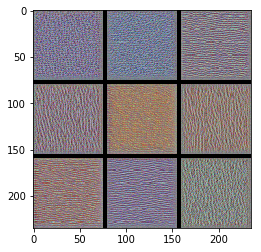

In [35]:
plt.imshow(stitched_filters)

## More resources
Keras Viz Package https://raghakot.github.io/keras-vis/